In [1]:
# ËØªÂèñÊï∞ÊçÆ
import os
import pandas as pd

df=pd.read_excel('ÂøÉËÇ∫ËøêÂä®ËØïÈ™åÊÄªË°®.xlsx', engine='openpyxl')

CDD1 = df.copy()

In [3]:
# ÊâãÂä®ÈÄâÁâπÂæÅ
import numpy as np
# Âà†Èô§ÈáçÂ§çÁöÑ 'ÊâãÊú∫' ÂàóÊï∞ÊçÆÔºåÂè™‰øùÁïôÁ¨¨‰∏ÄÊ¨°Âá∫Áé∞ÁöÑË°å
df = df.drop_duplicates(subset=['ÊâãÊú∫'], keep='first')
selected_columns = [
    'Age',
    'Sex',
    'Weight',
    'Height',
    'Âçß‰ΩçÂøÉÂÆ§Áéá',
    'Â≥∞ÂÄºÂøÉÁéá',
    'Â≥∞ÂÄºÂäüÁéá',
    'Â≥∞ÂÄºÊ∞ßËÑâ',
    # 'ŒîV02/ŒîWR',ÂÖ®Áº∫Â§± ‰∏çË¶Å
    'VE/VCO2ÊñúÁéá.1',
    'ÈùôÊÅØË°ÄÂéã-Êî∂Áº©Âéã',
    'ÈùôÊÅØË°ÄÂéã-ËàíÂº†Âéã',
    'FVC',
    'VCmax',
    'FEV1',
    'FEV1/FVC',
    'MVV',
    'ËøêÂä®‰∏≠ÊúÄÈ´òÊî∂Áº©Âéã',
    'ËøêÂä®ÁªàÊ≠¢Âêé3ÂàÜÈíüÊî∂Áº©Âéã',
    'ËøêÂä®‰∏≠ÊúÄÈ´òËàíÂº†Âéã',
    'ËøêÂä®ÁªàÊ≠¢Âêé3ÂàÜÈíüËàíÂº†Âéã',
    'ËøêÂä®ÁªàÊ≠¢Âêé1ÂàÜÈíüÂøÉÁéá',
    'ËøêÂä®ÁªàÊ≠¢Âêé2ÂàÜÈíüÂøÉÁéá',
    'ËøêÂä®ÁªàÊ≠¢Âêé3ÂàÜÈíüÂøÉÁéá',
    'Â≥∞ÂÄºÊ∞ßËÄó',
    'Â≥∞ÂÄºÂÖ¨Êñ§Ê∞ßËÄó',
    'Â≥∞ÂÄºÂàÜÈíüÈÄöÊ∞îÈáè',
    'ÂëºÂê∏ÂïÜ',
    'ÊØèÂàÜÈíüÈÄöÊ∞îÈáè(ÊØ´Âçá)',
    'load-maxload',
    'VO2-AT',
    'VCO2-AT',
    'VCO2-Max.Load',
    'VCO2/kg-AT',
    'VCO2/kg-Max.Load',
    'HR-AT',
    'HR-Max.Load',
    'BPsys-AT',
    'BPsys-Max.Load',
    'BPdia_AT',
    'BPdia-Max.Load',
    'VE-AT',
    'VT-AT',
    'f-ergo-AT',
    'BR-AT',
    # 'VD/VT-AT',
    # 'VD/VT-Max.Load',
    'EQO2-Max.Load',
    'EQCO2-Max.Load',
    'PETO2-AT',
    'PETO2-Max.Load',
    'PETCO2-AT',
    'PETCO2-Max.Load',
    'MAX BP*HR',
    'Threshold Power'
]

df = df[selected_columns]

In [4]:
# ÊâãÂä®Ê∏ÖÊ¥óÊï∞ÊçÆ
# Â∞ÜÊâÄÊúâ0ÂÄº„ÄÅÈùûÊï∞ÂÄºÊ†áËÆ∞‰∏∫Áº∫Â§±ÔºåÁªü‰∏ÄËΩ¨Êç¢‰∏∫Êï∞ÂÄºÂûã
import pandas as pd
import numpy as np

# Á§∫‰æãÊï∞ÊçÆÔºà‰Ω†ÂèØ‰ª•Áî®Ëá™Â∑±ÁöÑ df = pd.read_csv(...) ÊõøÊç¢Ôºâ
# df = pd.read_csv('‰Ω†ÁöÑÊñá‰ª∂Ë∑ØÂæÑ.csv')

# ÂÆö‰πâËΩ¨Êç¢ÂáΩÊï∞
def convert_to_numeric(value):
    try:
        numeric_value = pd.to_numeric(value, errors='coerce')
        # Â¶ÇÊûúÊòØ‰∏Ä‰∏™ÂèØËø≠‰ª£ÁöÑÁªìÊûúÔºàÊØîÂ¶Ç SeriesÔºâÔºåÈÇ£Â∞±ÂèñÁ¨¨‰∏Ä‰∏™ÂÄº
        if hasattr(numeric_value, '__iter__'):
            numeric_value = numeric_value.iloc[0]
        if numeric_value == 0:
            return np.nan
        return numeric_value
    except:
        return np.nan

# ÁªüËÆ°ÊØèÂàóËΩ¨Êç¢Â§±Ë¥•ÁöÑÊï∞Èáè
failed_counts = {}
for col in df.columns:
    if col == 'Sex':  # Ë∑≥Ëøá 'Sex' Âàó
        continue
    try:
        original_count = df[col].notna().sum()  # Á°Æ‰øùÊòØÊï∞Â≠ó
        df[col] = df[col].apply(convert_to_numeric)
        new_count = df[col].notna().sum()
        failed_count = int(original_count - new_count)  # ÊòæÂºèËΩ¨Êç¢‰∏∫Êï¥Êï∞
        if failed_count > 0:
            failed_counts[col] = failed_count
    except Exception as e:
        print(f"Â§ÑÁêÜÂàó '{col}' Êó∂Âá∫ÈîôÔºö{e}")

# ËæìÂá∫ÁªìÊûú
if failed_counts:
    print("ËΩ¨Êç¢Â§±Ë¥•ÁöÑÂàóÂèäÂÖ∂Êï∞ÈáèÔºö")
    for col, count in failed_counts.items():
        print(f"Âàó '{col}': {count} ‰∏™ÂÄºËΩ¨Êç¢Â§±Ë¥•")
else:
    print("ÊâÄÊúâÂàóÂùáÊàêÂäüËΩ¨Êç¢ÔºåÊó†Â§±Ë¥•ÂÄº„ÄÇ")

# Âà†Èô§Áº∫Â§±ÊØî‰æã80%‰ª•‰∏äÁöÑÂàóÔºåÂà†Èô§ÊâÄÊúâ Age ‰∏∫Áº∫Â§±ÁöÑË°å
import pandas as pd

# ÂÅáËÆæ df ÊòØ‰Ω†ÁöÑÊï∞ÊçÆÈõÜ

# ËÆ°ÁÆóÊØè‰∏ÄÂàóÁöÑÁº∫Â§±ÂÄºÊØî‰æã
missing_values_ratio = df.isnull().mean()

# ÊâæÂá∫Áº∫Â§±ÂÄºÊØî‰æãÂ§ß‰∫é80%ÁöÑÂàó
columns_to_drop = missing_values_ratio[missing_values_ratio > 0.8].index

# Âà†Èô§Ëøô‰∫õÂàó
df = df.drop(columns=columns_to_drop)

# ÊâìÂç∞Âà†Èô§ÁöÑÂàóÂêç
print("Âà†Èô§ÁöÑÂàóÂêçÔºö")
print(columns_to_drop)
# Âà†Èô§ÊâÄÊúâ Age ‰∏∫Áº∫Â§±ÁöÑË°å
initial_row_count = df.shape[0]
df = df.dropna(subset=['Age'])
rows_dropped = initial_row_count - df.shape[0]

# ÊâìÂç∞Âà†Èô§ÁöÑË°åÊï∞
print(f"Âà†Èô§ÁöÑË°åÊï∞Ôºö{rows_dropped}")
# ÊÄßÂà´ËΩ¨Êç¢
df['Sex'] = df['Sex'].map({'Áî∑': 1, 'Â•≥': 0})
df = df.apply(pd.to_numeric, errors='coerce')


ËΩ¨Êç¢Â§±Ë¥•ÁöÑÂàóÂèäÂÖ∂Êï∞ÈáèÔºö
Âàó 'Age': 1 ‰∏™ÂÄºËΩ¨Êç¢Â§±Ë¥•
Âàó 'Âçß‰ΩçÂøÉÂÆ§Áéá': 1 ‰∏™ÂÄºËΩ¨Êç¢Â§±Ë¥•
Âàó 'Â≥∞ÂÄºÊ∞ßËÑâ': 1 ‰∏™ÂÄºËΩ¨Êç¢Â§±Ë¥•
Âàó 'VE/VCO2ÊñúÁéá.1': 184 ‰∏™ÂÄºËΩ¨Êç¢Â§±Ë¥•
Âàó 'ÈùôÊÅØË°ÄÂéã-Êî∂Áº©Âéã': 143 ‰∏™ÂÄºËΩ¨Êç¢Â§±Ë¥•
Âàó 'ÈùôÊÅØË°ÄÂéã-ËàíÂº†Âéã': 143 ‰∏™ÂÄºËΩ¨Êç¢Â§±Ë¥•
Âàó 'ËøêÂä®‰∏≠ÊúÄÈ´òÊî∂Áº©Âéã': 29 ‰∏™ÂÄºËΩ¨Êç¢Â§±Ë¥•
Âàó 'ËøêÂä®‰∏≠ÊúÄÈ´òËàíÂº†Âéã': 29 ‰∏™ÂÄºËΩ¨Êç¢Â§±Ë¥•
Âàó 'Â≥∞ÂÄºÊ∞ßËÄó': 1 ‰∏™ÂÄºËΩ¨Êç¢Â§±Ë¥•
Âàó 'Â≥∞ÂÄºÂÖ¨Êñ§Ê∞ßËÄó': 1 ‰∏™ÂÄºËΩ¨Êç¢Â§±Ë¥•
Âàó 'ÂëºÂê∏ÂïÜ': 1 ‰∏™ÂÄºËΩ¨Êç¢Â§±Ë¥•
Âàó 'VO2-AT': 1 ‰∏™ÂÄºËΩ¨Êç¢Â§±Ë¥•
Âàó 'VCO2/kg-AT': 1 ‰∏™ÂÄºËΩ¨Êç¢Â§±Ë¥•
Âàó 'HR-AT': 1 ‰∏™ÂÄºËΩ¨Êç¢Â§±Ë¥•
Âàó 'BPsys-AT': 42 ‰∏™ÂÄºËΩ¨Êç¢Â§±Ë¥•
Âàó 'BPsys-Max.Load': 29 ‰∏™ÂÄºËΩ¨Êç¢Â§±Ë¥•
Âàó 'BPdia_AT': 42 ‰∏™ÂÄºËΩ¨Êç¢Â§±Ë¥•
Âàó 'BPdia-Max.Load': 29 ‰∏™ÂÄºËΩ¨Êç¢Â§±Ë¥•
Âàó 'VE-AT': 1 ‰∏™ÂÄºËΩ¨Êç¢Â§±Ë¥•
Âàó 'VT-AT': 1 ‰∏™ÂÄºËΩ¨Êç¢Â§±Ë¥•
Âàó 'BR-AT': 1 ‰∏™ÂÄºËΩ¨Êç¢Â§±Ë¥•
Âàó 'PETO2-AT': 1 ‰∏™ÂÄºËΩ¨Êç¢Â§±Ë¥•
Âàó 'PETCO2-AT': 1 ‰∏™ÂÄºËΩ¨Êç¢Â§±Ë¥•
Âàó 'MAX BP*HR

In [5]:
# ÊâãÂä®Â§ÑÁêÜÂºÇÂ∏∏Ê†ºÂºèÊï∞ÊçÆ
# Â∞ÜÊâÄÊúâ0ÂÄº„ÄÅÈùûÊï∞ÂÄºÊ†áËÆ∞‰∏∫Áº∫Â§±ÔºåÁªü‰∏ÄËΩ¨Êç¢‰∏∫Êï∞ÂÄºÂûã
import pandas as pd
import numpy as np

# Á§∫‰æãÊï∞ÊçÆÔºà‰Ω†ÂèØ‰ª•Áî®Ëá™Â∑±ÁöÑ df = pd.read_csv(...) ÊõøÊç¢Ôºâ
# df = pd.read_csv('‰Ω†ÁöÑÊñá‰ª∂Ë∑ØÂæÑ.csv')

# ÂÆö‰πâËΩ¨Êç¢ÂáΩÊï∞
def convert_to_numeric(value):
    try:
        numeric_value = pd.to_numeric(value, errors='coerce')
        # Â¶ÇÊûúÊòØ‰∏Ä‰∏™ÂèØËø≠‰ª£ÁöÑÁªìÊûúÔºàÊØîÂ¶Ç SeriesÔºâÔºåÈÇ£Â∞±ÂèñÁ¨¨‰∏Ä‰∏™ÂÄº
        if hasattr(numeric_value, '__iter__'):
            numeric_value = numeric_value.iloc[0]
        if numeric_value == 0:
            return np.nan
        return numeric_value
    except:
        return np.nan

# ÁªüËÆ°ÊØèÂàóËΩ¨Êç¢Â§±Ë¥•ÁöÑÊï∞Èáè
failed_counts = {}
for col in df.columns:
    if col == 'Sex':  # Ë∑≥Ëøá 'Sex' Âàó
        continue
    try:
        original_count = df[col].notna().sum()  # Á°Æ‰øùÊòØÊï∞Â≠ó
        df[col] = df[col].apply(convert_to_numeric)
        new_count = df[col].notna().sum()
        failed_count = int(original_count - new_count)  # ÊòæÂºèËΩ¨Êç¢‰∏∫Êï¥Êï∞
        if failed_count > 0:
            failed_counts[col] = failed_count
    except Exception as e:
        print(f"Â§ÑÁêÜÂàó '{col}' Êó∂Âá∫ÈîôÔºö{e}")

# ËæìÂá∫ÁªìÊûú
if failed_counts:
    print("ËΩ¨Êç¢Â§±Ë¥•ÁöÑÂàóÂèäÂÖ∂Êï∞ÈáèÔºö")
    for col, count in failed_counts.items():
        print(f"Âàó '{col}': {count} ‰∏™ÂÄºËΩ¨Êç¢Â§±Ë¥•")
else:
    print("ÊâÄÊúâÂàóÂùáÊàêÂäüËΩ¨Êç¢ÔºåÊó†Â§±Ë¥•ÂÄº„ÄÇ")

# Âà†Èô§Áº∫Â§±ÊØî‰æã80%‰ª•‰∏äÁöÑÂàóÔºåÂà†Èô§ÊâÄÊúâ Age ‰∏∫Áº∫Â§±ÁöÑË°å
import pandas as pd

# ÂÅáËÆæ df ÊòØ‰Ω†ÁöÑÊï∞ÊçÆÈõÜ

# ËÆ°ÁÆóÊØè‰∏ÄÂàóÁöÑÁº∫Â§±ÂÄºÊØî‰æã
missing_values_ratio = df.isnull().mean()

# ÊâæÂá∫Áº∫Â§±ÂÄºÊØî‰æãÂ§ß‰∫é80%ÁöÑÂàó
columns_to_drop = missing_values_ratio[missing_values_ratio > 0.8].index

# Âà†Èô§Ëøô‰∫õÂàó
df = df.drop(columns=columns_to_drop)

# ÊâìÂç∞Âà†Èô§ÁöÑÂàóÂêç
print("Âà†Èô§ÁöÑÂàóÂêçÔºö")
print(columns_to_drop)
# Âà†Èô§ÊâÄÊúâ Age ‰∏∫Áº∫Â§±ÁöÑË°å
initial_row_count = df.shape[0]
df = df.dropna(subset=['Age'])
rows_dropped = initial_row_count - df.shape[0]

# ÊâìÂç∞Âà†Èô§ÁöÑË°åÊï∞
print(f"Âà†Èô§ÁöÑË°åÊï∞Ôºö{rows_dropped}")
df = df.apply(pd.to_numeric, errors='coerce')

ÊâÄÊúâÂàóÂùáÊàêÂäüËΩ¨Êç¢ÔºåÊó†Â§±Ë¥•ÂÄº„ÄÇ
Âà†Èô§ÁöÑÂàóÂêçÔºö
Index([], dtype='object')
Âà†Èô§ÁöÑË°åÊï∞Ôºö0


In [6]:
# ‰∏≠‰ΩçÊï∞Â°´ÂÖÖ„ÄÅLassoÁâπÂæÅÈÄâÊã©„ÄÅÂü∫Ê®°ÂûãÊØîËæÉÁ≠õÈÄâ„ÄÅÁõ∏ÂÖ≥ÊÄßÁü©Èòµ„ÄÅÁªÑÂêàÊé®Ëçê
# ËøôÈáåÂÖàËøõË°åÁâπÂæÅÈÄâÊã©ÊòØ‰πãÂâçËØïËøá‰∏§Ê¨°ÂçïÁã¨ÊãüÂêàÊâÄÊúâÊ®°ÂûãÔºåÂèëÁé∞ÂèòÈáèÂÜó‰ΩôÈùûÂ∏∏‰∏•ÈáçÔºåÂèçÊ≠£ÂêéÈù¢ÂÅö‰πüÊòØ‰∏ÄÊ†∑ÁöÑ
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.pipeline import make_pipeline

# Ê®°Âûã
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

import warnings
warnings.filterwarnings("ignore")

try:
    from xgboost import XGBRegressor
except ImportError:
    XGBRegressor = None

try:
    from lightgbm import LGBMRegressor
except ImportError:
    LGBMRegressor = None

# ============ Step 1Ôºö‰∏≠‰ΩçÊï∞ÊèíË°• =============
df_all = df.copy()
X = df_all.drop(columns=["Age"])
y = df_all["Age"]

imputer = SimpleImputer(strategy="median")
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# ============ Step 2ÔºöÊ†áÂáÜÂåñ =============
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X.columns)

# ============ Step 3ÔºöLasso ÁâπÂæÅÈÄâÊã© =============
lasso_selector = SelectFromModel(estimator=LassoCV(cv=5, random_state=42), threshold='mean')
lasso_selector.fit(X_scaled, y)
selected_features = X_scaled.columns[lasso_selector.get_support()]
X_final = X_scaled[selected_features]
print(f"‚úÖ LassoÈÄâÊã©‰∫Ü {len(selected_features)} ‰∏™ÁâπÂæÅÔºö\n{selected_features.tolist()}")

# ============ Step 4ÔºöÂÆö‰πâÂü∫Ê®°Âûã =============
models = {
    "Ridge": make_pipeline(StandardScaler(), Ridge()),
    "Lasso": make_pipeline(StandardScaler(), Lasso()),
    "ElasticNet": make_pipeline(StandardScaler(), ElasticNet()),
    "RandomForest": RandomForestRegressor(n_estimators=100),
    "GradientBoosting": GradientBoostingRegressor(),
    "KNN": make_pipeline(StandardScaler(), KNeighborsRegressor()),
    "SVR": make_pipeline(StandardScaler(), SVR()),
    "MLP": make_pipeline(StandardScaler(), MLPRegressor(max_iter=1000)),
}

if XGBRegressor:
    models["XGBoost"] = XGBRegressor()
if LGBMRegressor:
    models["LightGBM"] = LGBMRegressor()

# ============ Step 5ÔºöÊ®°Âûã‰∫§ÂèâÈ™åËØÅ + È¢ÑÊµã‰øùÂ≠ò =============
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

results = {}
predictions = {}

for name, model in models.items():
    scores = cross_val_score(model, X_final, y, scoring=scorer, cv=cv)
    rmse_scores = np.sqrt(-scores)
    results[name] = rmse_scores.mean()

    model.fit(X_final, y)
    predictions[name] = model.predict(X_final)

# ============ Step 6ÔºöËæìÂá∫ÁªìÊûú =============
results_df = pd.DataFrame.from_dict(results, orient='index', columns=["CV_RMSE"])
results_df.sort_values("CV_RMSE", inplace=True)
print("\nüîç ÂêÑÊ®°Âûã CV RMSE ÊéíÂêçÔºö")
print(results_df)

# ============ Step 7ÔºöËÆ°ÁÆóÈ¢ÑÊµãÁõ∏ÂÖ≥ÊÄßÁü©Èòµ =============
pred_df = pd.DataFrame(predictions)
correlation_matrix = pred_df.corr()
print("\nüîó Ê®°ÂûãÈ¢ÑÊµãÁõ∏ÂÖ≥ÊÄßÁü©ÈòµÔºö")
print(correlation_matrix)

# ============ Step 8ÔºöÊé®ËçêÁªÑÂêàËæÖÂä©Ôºà‰ΩéÁõ∏ÂÖ≥ÊÄß + È´òÊÄßËÉΩÔºâ ============
top_models = results_df.index[:5]
low_corr_pairs = correlation_matrix.loc[top_models, top_models] < 0.9

print("\n‚úÖ Êé®ËçêÁªÑÂêàÊ®°ÂûãÔºàÊÄßËÉΩÂ•Ω + Â∑ÆÂºÇÂ§ßÔºâÔºö")
for i in top_models:
    for j in top_models:
        if i != j and low_corr_pairs.loc[i, j]:
            print(f"{i} + {j}")


‚úÖ LassoÈÄâÊã©‰∫Ü 20 ‰∏™ÁâπÂæÅÔºö
['Sex', 'Â≥∞ÂÄºÂøÉÁéá', 'Â≥∞ÂÄºÂäüÁéá', 'FEV1', 'Â≥∞ÂÄºÊ∞ßËÄó', 'Â≥∞ÂÄºÂàÜÈíüÈÄöÊ∞îÈáè', 'ÊØèÂàÜÈíüÈÄöÊ∞îÈáè(ÊØ´Âçá)', 'load-maxload', 'VCO2-AT', 'VCO2/kg-AT', 'VCO2/kg-Max.Load', 'HR-AT', 'BPsys-AT', 'VE-AT', 'f-ergo-AT', 'BR-AT', 'EQCO2-Max.Load', 'PETO2-AT', 'PETCO2-AT', 'PETCO2-Max.Load']
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000983 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3147
[LightGBM] [Info] Number of data points in the train set: 2056, number of used features: 20
[LightGBM] [Info] Start training from score 44.404183
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000568 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3140
[LightGBM] [Info] Number of data points in the train set: 2057, number of used features: 20
[LightGBM] [Info] Start training from sco


üåü Stacking Ê®°Âûã CV RMSE: 9.165


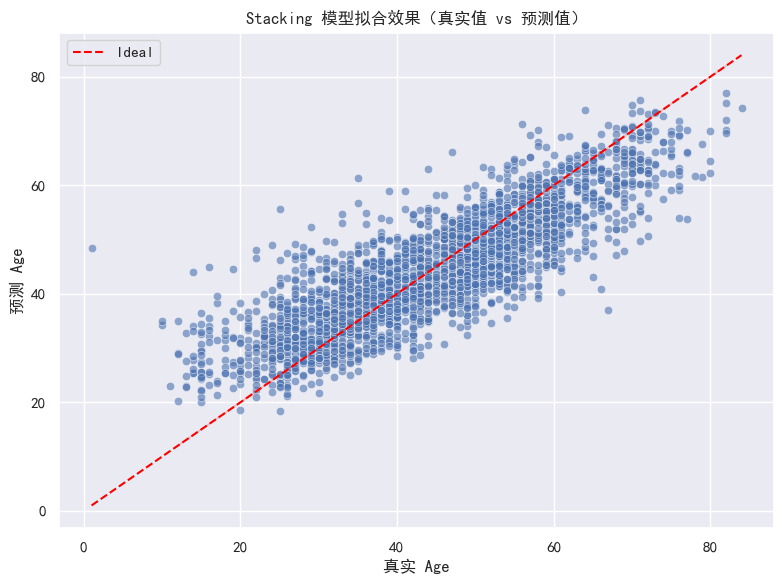

In [7]:
# Â†ÜÂè†Ê®°ÂûãÁ°ÆÂÆö„ÄÅËÆ≠ÁªÉ„ÄÅÊ£ÄÈ™åÔºàÂÖà5Êäò‰∫§ÂèâÈ™åËØÅÂÜçÊï¥‰ΩìÊãüÂêàÔºâ
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ‚úÖ Step 1ÔºöÂÆö‰πâÂü∫Ê®°Âûã + Ê¨°Á∫ßÊ®°Âûã
base_models = [
    ('ridge', Ridge()),
    ('lgb', LGBMRegressor()),
    ('svr', SVR())
]
final_model = Ridge()  # Ê¨°Á∫ßÊ®°ÂûãÔºà‰πüÂèØ‰ª•Êç¢Êàê GBDT„ÄÅLassoÔºâ

# ‚úÖ Step 2ÔºöÂ†ÜÂè†ÂõûÂΩíÂô®
stack_model = StackingRegressor(
    estimators=base_models,
    final_estimator=final_model,
    passthrough=False,  # Ëã•ÈúÄËÆ©Ê¨°Á∫ßÊ®°Âûã‰πüÊé•Êî∂ÂéüÂßãÁâπÂæÅÔºåÂàôËÆæ‰∏∫ True
    cv=5,
    n_jobs=-1
)

# ‚úÖ Step 3Ôºö‰∫§ÂèâÈ™åËØÅËØÑ‰º∞Ôºà5ÊäòÔºâ
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_rmse = np.sqrt(-cross_val_score(stack_model, X_final, y, 
                                   scoring="neg_mean_squared_error", cv=cv)).mean()
print(f"\n Stacking Ê®°Âûã CV RMSE: {cv_rmse:.3f}")

# ‚úÖ Step 4ÔºöÊï¥‰ΩìÊãüÂêà & È¢ÑÊµã
stack_model.fit(X_final, y)
y_pred = stack_model.predict(X_final)

#üåüüåüüåüsns‰πüÂèØËÉΩÂá∫Áé∞‰∏≠Êñá‰∏çÊòæÁ§∫ÁöÑÈóÆÈ¢òÔºå‰∏çË¶ÅÁî®pltÁöÑ‰ª£Á†ÅÊîπ‰∫ÜÁ¨ëÊ≠ª
sns.set(font='SimHei',font_scale=1.0) 
# ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰Ωì
plt.rcParams['font.sans-serif'] = ['SimHei']  # Èªë‰Ωì
plt.rcParams['axes.unicode_minus'] = False    # Ê≠£Á°ÆÊòæÁ§∫Ë¥üÂè∑

# ‚úÖ Step 5ÔºöÂèØËßÜÂåñÔºöÁúüÂÆûÂÄº vs È¢ÑÊµãÂÄº
plt.figure(figsize=(8,6))
sns.scatterplot(x=y, y=y_pred, alpha=0.6)
sns.lineplot(x=y, y=y, color='red', linestyle='--', label='Ideal')
plt.xlabel("ÁúüÂÆû Age")
plt.ylabel("È¢ÑÊµã Age")
plt.title("Stacking Ê®°ÂûãÊãüÂêàÊïàÊûúÔºàÁúüÂÆûÂÄº vs È¢ÑÊµãÂÄºÔºâ")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
# ÊòæÁ§∫Â∑•ÂÖ∑ ÂÖ®ÊòæÁ§∫
import pandas as pd

# ÊòæÁ§∫ÊâÄÊúâÂàó
pd.set_option('display.max_columns', None)

# ÊòæÁ§∫ÊâÄÊúâË°å
pd.set_option('display.max_rows', None)

# ËÆæÁΩÆÊØèÂàóÂÜÖÂÆπÁöÑÊúÄÂ§ßÊòæÁ§∫ÂÆΩÂ∫¶ÔºåÈÅøÂÖçÂÜÖÂÆπË¢´Êà™Êñ≠
pd.set_option('display.max_colwidth', None)

# ËÆæÁΩÆÊòæÁ§∫ÂÆΩÂ∫¶ÔºåÈÅøÂÖçÊç¢Ë°å
pd.set_option('display.width', None)

In [9]:
# ÊòæÁ§∫Â∑•ÂÖ∑ ÈÉ®ÂàÜÊòæÁ§∫
# ÊÅ¢Â§çÊòæÁ§∫ÂàóÊï∞‰∏∫ÈªòËÆ§
pd.reset_option("display.max_columns")

# ÊÅ¢Â§çÊòæÁ§∫Ë°åÊï∞‰∏∫ÈªòËÆ§
pd.reset_option("display.max_rows")

# ÊÅ¢Â§çÊúÄÂ§ßÂàóÂÆΩ‰∏∫ÈªòËÆ§
pd.reset_option("display.max_colwidth")

# ÊÅ¢Â§çÊÄªÊòæÁ§∫ÂÆΩÂ∫¶‰∏∫ÈªòËÆ§
pd.reset_option("display.width")


üìä Permutation Importance Ââç10ÂèòÈáèÔºö
FEV1          3.131708
HR-AT         1.442747
BPsys-AT      1.441568
Â≥∞ÂÄºÂàÜÈíüÈÄöÊ∞îÈáè       1.169059
Â≥∞ÂÄºÂäüÁéá          1.135207
Â≥∞ÂÄºÊ∞ßËÄó          1.097095
ÊØèÂàÜÈíüÈÄöÊ∞îÈáè(ÊØ´Âçá)    1.086727
Â≥∞ÂÄºÂøÉÁéá          0.947127
f-ergo-AT     0.856438
Sex           0.844499
dtype: float64


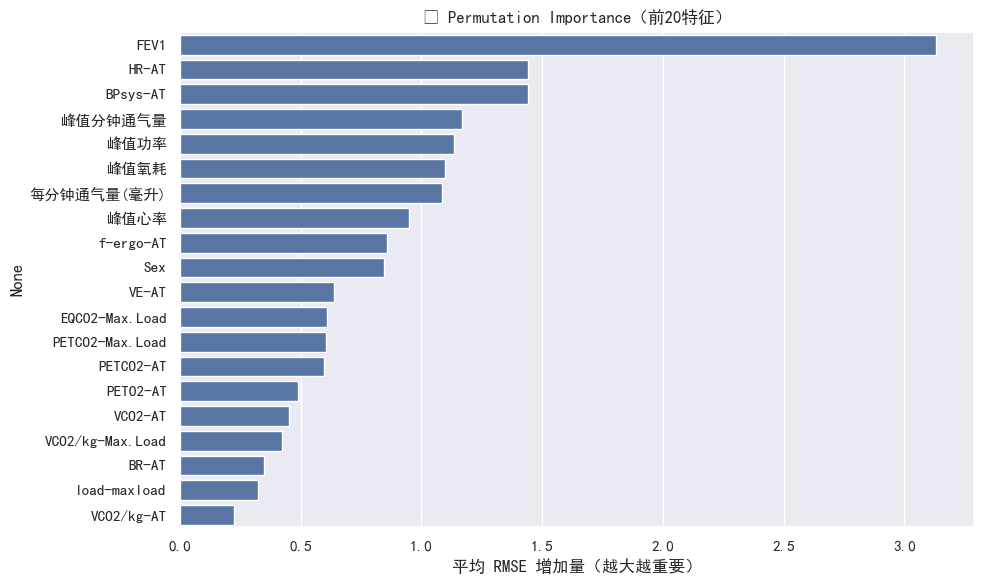

In [10]:
# permutation importanceÂàÜÊûêÂèòÈáèË¥°ÁåÆÂ∫¶
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

# ÂÅáËÆæ‰Ω†Â∑≤Áªè fit Ëøá stack_model
# Âπ∂‰∏î X_final ÊòØÁî®‰∫éËÆ≠ÁªÉÁöÑÊúÄÁªàÁâπÂæÅÈõÜÔºàÂ∑≤ÁªèÊèíË°•„ÄÅÊ†áÂáÜÂåñ„ÄÅÁâπÂæÅÈÄâÊã©Ôºâ

# Permutation ImportanceÔºà‰ΩøÁî®ËÆ≠ÁªÉÊï∞ÊçÆÔºâ
result = permutation_importance(
    stack_model, X_final, y,
    n_repeats=10, random_state=42, scoring='neg_root_mean_squared_error'
)

# ÁªìÊûúÊï¥ÁêÜ
importances = pd.Series(result.importances_mean, index=X_final.columns)
importances = importances.sort_values(ascending=False)

# ÊâìÂç∞ÂâçÂá†È°π
print("üìä Permutation Importance Ââç10ÂèòÈáèÔºö")
print(importances.head(10))

# ÂèØËßÜÂåñ
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values[:20], y=importances.index[:20])
plt.title("üéØ Permutation ImportanceÔºàÂâç20ÁâπÂæÅÔºâ")
plt.xlabel("Âπ≥Âùá RMSE Â¢ûÂä†ÈáèÔºàË∂äÂ§ßË∂äÈáçË¶ÅÔºâ")
plt.tight_layout()
plt.show()


In [11]:
# ËÆ°ÁÆóÁîüÁâ©Âπ¥ÈæÑ‰∏éÂä†ÈÄüÂπ¥ÈæÑ
# Ê≥®ÊÑèÔºöÁ°Æ‰øù y_pred ÊòØÊ®°ÂûãÂØπ df ÁöÑ X_final ÁöÑÈ¢ÑÊµãÁªìÊûúÔºåÈ°∫Â∫èÂØπÈΩê

# Ê∑ªÂä†È¢ÑÊµãÂπ¥ÈæÑÂàóÔºàchAgeÔºâ
df["chAge"] = y_pred

# Ê∑ªÂä†Âä†ÈÄüÂπ¥ÈæÑÂàóÔºàacAge = È¢ÑÊµãÂπ¥ÈæÑ - ÂÆûÈôÖÂπ¥ÈæÑÔºâ
df["acAge"] = df["chAge"] - df["Age"]

# Ê£ÄÊü•Êñ∞Âàó
print(df[["Age", "chAge", "acAge"]].head())


    Age      chAge     acAge
0  59.0  57.712855 -1.287145
1  64.0  58.769486 -5.230514
2  44.0  42.600363 -1.399637
3  55.0  56.575047  1.575047
4  57.0  50.680951 -6.319049


In [12]:
CDD2=df.copy()
# Á∫≥ÂÖ•ÁñæÁóÖËØäÊñ≠Âπ∂ËøõË°åÂàÜÁ±ªÔºåÁªüËÆ°ÊØè‰∏ÄÁ±ªÁöÑÊ†∑Êú¨Èáè
# ÂÅáËÆæ CDD1 Â∑≤ÁªèÂä†ËΩΩ‰∏∫ DataFrame
# Á°Æ‰øù CDD1.index ÊòØÂíå df.index ‰∏ÄËá¥ÁöÑÔºàÊàñËÄÖÊòØÂåÖÂê´ÁöÑÂ≠êÈõÜÔºâ

# Â∞ÜËØäÊñ≠ÂàóÂØπÈΩêÂêéÊ∑ªÂä†Âà∞ df
df["ËØäÊñ≠"] = CDD1["ËØäÊñ≠"]

# ÔºàÂèØÈÄâÔºâÊ£ÄÊü•ÂØπÈΩêÊÉÖÂÜµ
# print(df[["Age", "chAge", "acAge", "ËØäÊñ≠"]].head())

import pandas as pd

# ÂÅáËÆæ‰Ω†ÁöÑ DataFrame Â∑≤ÁªèÂ≠òÂú®Ôºå‰∏îËØäÊñ≠ÂàóÂêç‰∏∫ 'ËØäÊñ≠'
# df = pd.read_csv('your_data.csv')  # Â¶ÇÊûúÈúÄË¶ÅÁöÑËØù

# 1. È¢ÑÂÖàÂÆö‰πâÊÉ≥Ë¶ÅÊãÜÂá∫ÁöÑÂàÜÁ±ªÔºàÁ§∫‰æãÔºâ
categories = [
    'ËÉ∏Èó∑',
    'ËÉ∏ÁóõÊü•Âõ†',
    'ÂøÉÊÇ∏ÂæÖÊü•',
    'ÂøÉÂæãÂ§±Â∏∏',
    'Â§¥Áóõ',
    'ÈòµÂèëÊÄßÂøÉÊàøÁ∫§È¢§',
    'È´òË°ÄÂéã',
    '2ÂûãÁ≥ñÂ∞øÁóÖ',
    'ÂÜ†Áä∂Âä®ËÑâÁ≤•Ê†∑Á°¨ÂåñÊÄßÂøÉËÑèÁóÖ',
    'ÂÅ•Â∫∑Êü•‰Ωì',
    'ÂøÉË°ÄÁÆ°ÊÄßÁ•ûÁªèÂÆòËÉΩÁóá',
    '‰∏çÁ®≥ÂÆöÂûãÂøÉÁªûÁóõ',
    '‰∏≠Â§ÆÂûãÊàøÈó¥ÈöîÁº∫Êçü',
    'ÂÆ§Èó¥ÈöîÁº∫Êçü‰øÆË°•ÊúØÂêé',
    'ÂçµÂúÜÂ≠îÊú™Èó≠Â∞ÅÂ†µÊúØÂêé',
    'ÂøÉÁîµÂõæÂºÇÂ∏∏',
    'È´òËÑÇË°ÄÁóá',
    'È´òÂêåÂûãÂçäËÉ±Ê∞®ÈÖ∏Ë°ÄÁóá',
    'ÂÅ•Â∫∑‰ΩìÊ£Ä',
    'ÂøÉÊÇ∏',
    '‰ΩìÊ£Ä',
]

# 2. ÂØπÊØè‰∏™ÂàÜÁ±ªÔºåÊ£ÄÊü•ËØäÊñ≠ÊñáÊú¨‰∏≠ÊòØÂê¶ÂåÖÂê´ËØ•ÂÖ≥ÈîÆËØçÔºåÂåÖÂê´ÂàôÊ†áËÆ∞1ÔºåÂê¶Âàô0
for cat in categories:
    df[cat] = df['ËØäÊñ≠'].str.contains(cat, na=False).astype(int)

# 3. ‚ÄúÁº∫Â§±‚ÄùÂàóÔºöÂéüËØäÊñ≠‰∏∫Á©∫ÊàñÂÖ®Á©∫ÁôΩÊó∂Ê†áËÆ∞1ÔºåÂê¶Âàô0
df['Áº∫Â§±'] = (df['ËØäÊñ≠'].isna() | (df['ËØäÊñ≠'].str.strip() == '')).astype(int)

# 4. ‚ÄúÁâπÊÆä‚ÄùÂàóÔºöÂéüËØäÊñ≠ÈùûÁ©∫Ôºå‰ΩÜ‰∏çÂåÖÂê´‰ªª‰ΩïÈ¢ÑËÆæÂàÜÁ±ªÊó∂Ê†áËÆ∞1ÔºåÂê¶Âàô0
#    ‚Äî‚Äî Âç≥ÔºöÁº∫Â§±=0 ‰∏î ÊâÄÊúâ categories Âàó‰πãÂíå‰∏∫0
df['ÁâπÊÆä'] = ((df['Áº∫Â§±'] == 0) & (df[categories].sum(axis=1) == 0)).astype(int)

# Ë¶ÅÁªüËÆ°ÁöÑÊâÄÊúâÂàóÂêç
count_cols = categories + ['Áº∫Â§±', 'ÁâπÊÆä']

# ÁªüËÆ°ÊØè‰∏ÄÂàó‰∏≠ÂÄº‰∏∫1ÁöÑË°åÊï∞
counts = df[count_cols].sum().sort_values(ascending=False)

# ËæìÂá∫ÁªìÊûú
counts



Áº∫Â§±              733
È´òË°ÄÂéã             457
ËÉ∏ÁóõÊü•Âõ†            302
ËÉ∏Èó∑              263
ÁâπÊÆä              233
ÂÜ†Áä∂Âä®ËÑâÁ≤•Ê†∑Á°¨ÂåñÊÄßÂøÉËÑèÁóÖ    188
È´òËÑÇË°ÄÁóá            179
ÂøÉÊÇ∏              161
ÂøÉÁîµÂõæÂºÇÂ∏∏           125
ÂÅ•Â∫∑Êü•‰Ωì            120
ÂøÉÂæãÂ§±Â∏∏             97
2ÂûãÁ≥ñÂ∞øÁóÖ            46
ÂøÉÊÇ∏ÂæÖÊü•             37
ÂøÉË°ÄÁÆ°ÊÄßÁ•ûÁªèÂÆòËÉΩÁóá        30
‰ΩìÊ£Ä               17
‰∏≠Â§ÆÂûãÊàøÈó¥ÈöîÁº∫Êçü         14
È´òÂêåÂûãÂçäËÉ±Ê∞®ÈÖ∏Ë°ÄÁóá        10
ÂÅ•Â∫∑‰ΩìÊ£Ä              8
Â§¥Áóõ                7
‰∏çÁ®≥ÂÆöÂûãÂøÉÁªûÁóõ           3
ÂçµÂúÜÂ≠îÊú™Èó≠Â∞ÅÂ†µÊúØÂêé         2
ÂÆ§Èó¥ÈöîÁº∫Êçü‰øÆË°•ÊúØÂêé         1
ÈòµÂèëÊÄßÂøÉÊàøÁ∫§È¢§           1
dtype: int64

In [17]:
CDD3=df.copy()
# ÊåâÁñæÁóÖÂàíÂàÜËÆ°ÁÆóÂä†ÈÄüÂπ¥ÈæÑÂ∑ÆÂºÇÊòæËëóÊÄß
from scipy.stats import ttest_ind, mannwhitneyu

results = []

for cat in categories + ['ÁâπÊÆä']:  # ‰∏çÂê´‚ÄúÁº∫Â§±‚ÄùÔºåÈÇ£ÊòØ NaN ÊÉÖÂÜµ
    group1 = df[df[cat] == 1]['acAge']
    group0 = df[df[cat] == 0]['acAge']
    
    if len(group1) > 5 and len(group0) > 5:  # ‰øùËØÅÊ†∑Êú¨Èáè
        # Ê≠£ÊÄÅÂàÜÂ∏É‰∏çÁ°ÆÂÆöÊó∂Âª∫ËÆÆÁî®ÈùûÂèÇÊï∞Ê£ÄÈ™å
        stat, pval = mannwhitneyu(group1, group0, alternative='two-sided')
        results.append({
            'ÂàÜÁ±ª': cat,
            'Ê≠£‰æã‰∫∫Êï∞': len(group1),
            'Èò¥ÊÄß‰∫∫Êï∞': len(group0),
            'Ê≠£‰æãacAgeÂùáÂÄº': group1.mean(),
            'Èò¥ÊÄßacAgeÂùáÂÄº': group0.mean(),
            'PÂÄº': pval
        })

results_df = pd.DataFrame(results).sort_values('PÂÄº')
results_df

ÂàÜÁ±ª  Ê≠£‰æã‰∫∫Êï∞  Èò¥ÊÄß‰∫∫Êï∞  Ê≠£‰æãacAgeÂùáÂÄº  Èò¥ÊÄßacAgeÂùáÂÄº            PÂÄº
7   ÂÜ†Áä∂Âä®ËÑâÁ≤•Ê†∑Á°¨ÂåñÊÄßÂøÉËÑèÁóÖ   188  2383  -2.774645   0.264229  1.532603e-07
1           ËÉ∏ÁóõÊü•Âõ†   302  2269   1.692815  -0.177702  1.559379e-05
12          È´òËÑÇË°ÄÁóá   179  2392  -1.730402   0.174652  2.412771e-03
0             ËÉ∏Èó∑   263  2308  -1.003793   0.161188  7.102431e-03
5            È´òË°ÄÂéã   457  2114  -0.923252   0.250686  9.424895e-03
8           ÂÅ•Â∫∑Êü•‰Ωì   120  2451  -1.400915   0.112662  1.118335e-02
11         ÂøÉÁîµÂõæÂºÇÂ∏∏   125  2446   1.255037  -0.019973  8.561809e-02
14          ÂÅ•Â∫∑‰ΩìÊ£Ä     8  2563  -4.196605   0.055247  1.522088e-01
16            ‰ΩìÊ£Ä    17  2554  -2.442705   0.058556  1.529809e-01
9      ÂøÉË°ÄÁÆ°ÊÄßÁ•ûÁªèÂÆòËÉΩÁóá    30  2541   1.706212   0.022369  1.842123e-01
2           ÂøÉÊÇ∏ÂæÖÊü•    37  2534  -1.741161   0.068054  1.956068e-01
3           ÂøÉÂæãÂ§±Â∏∏    97  2474   0.753157   0.014134  3.177385e-01
10      ‰∏≠Â§ÆÂûãÊàøÈó¥ÈöîÁº∫Êçü    14  2557   2.309182   0.029604  3.426567e-01
6          2ÂûãÁ≥ñÂ∞øÁóÖ    46  2525  -0.731466   0.056108  4.337749e-01
15            ÂøÉÊÇ∏   161  2410   0.055468   0.041118  6.250659e-01
17            ÁâπÊÆä   233  2338  -0.160929   0.062242  6.717031e-01
13     È´òÂêåÂûãÂçäËÉ±Ê∞®ÈÖ∏Ë°ÄÁóá    10  2561   0.285858   0.041065  8.709853e-01
4             Â§¥Áóõ     7  2564  -0.151529   0.042545  9.782386e-01

‚úÖ ÂÅ•Â∫∑Êü•‰ΩìÊ†∑Êú¨Êï∞: 120, ÂùáÂÄº: -1.40
‚ùó ÂÖ∂‰ªñ‰∫∫Áæ§Ê†∑Êú¨Êï∞: 2451, ÂùáÂÄº: 0.11
üìä Mann‚ÄìWhitney U Ê£ÄÈ™å P ÂÄº: 0.0112


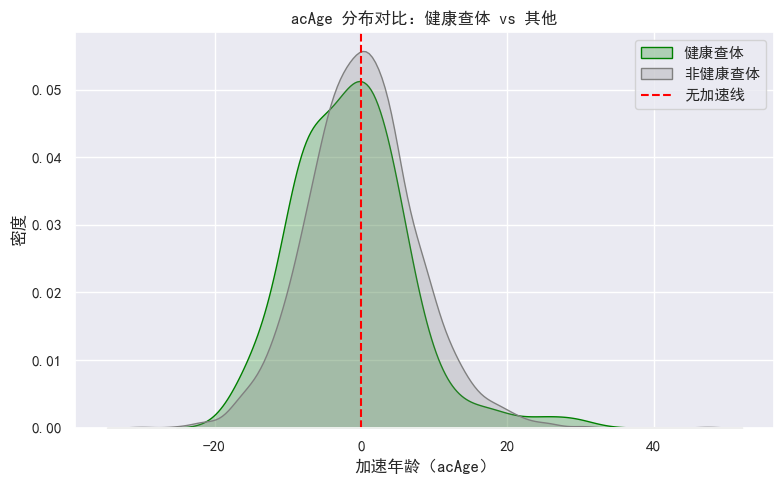

In [18]:
# ÂçïÁã¨ÊØîËæÉÂêÑÁñæÁóÖ‰∫∫Áæ§‰∏é‚ÄòÂÅ•Â∫∑Êü•‰Ωì‚Äô‰∫∫Áæ§ÁöÑÂπ¥ÈæÑÂä†ÈÄüÂ∑ÆÂºÇ
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

# ÂàÜÁªÑ
group_healthy = df[df["ÂÅ•Â∫∑Êü•‰Ωì"] == 1]["acAge"]
group_others = df[df["ÂÅ•Â∫∑Êü•‰Ωì"] == 0]["acAge"]

# ÈùûÂèÇÊï∞Ê£ÄÈ™å
stat, pval = mannwhitneyu(group_healthy, group_others, alternative='two-sided')

# ÊâìÂç∞ÁªüËÆ°ÁªìÊûú
print(f"‚úÖ ÂÅ•Â∫∑Êü•‰ΩìÊ†∑Êú¨Êï∞: {len(group_healthy)}, ÂùáÂÄº: {group_healthy.mean():.2f}")
print(f"‚ùó ÂÖ∂‰ªñ‰∫∫Áæ§Ê†∑Êú¨Êï∞: {len(group_others)}, ÂùáÂÄº: {group_others.mean():.2f}")
print(f"üìä Mann‚ÄìWhitney U Ê£ÄÈ™å P ÂÄº: {pval:.4f}")

# ÂèØËßÜÂåñ
plt.figure(figsize=(8,5))
sns.kdeplot(group_healthy, label='ÂÅ•Â∫∑Êü•‰Ωì', fill=True, color='green')
sns.kdeplot(group_others, label='ÈùûÂÅ•Â∫∑Êü•‰Ωì', fill=True, color='gray')
plt.axvline(0, color='red', linestyle='--', label='Êó†Âä†ÈÄüÁ∫ø')
plt.title("acAge ÂàÜÂ∏ÉÂØπÊØîÔºöÂÅ•Â∫∑Êü•‰Ωì vs ÂÖ∂‰ªñ")
plt.xlabel("Âä†ÈÄüÂπ¥ÈæÑÔºàacAgeÔºâ")
plt.ylabel("ÂØÜÂ∫¶")
plt.legend()
plt.tight_layout()
plt.show()

üìà acAge ‰∏é d_VO2peak ÁöÑÁõ∏ÂÖ≥Á≥ªÊï∞Ôºö-0.217


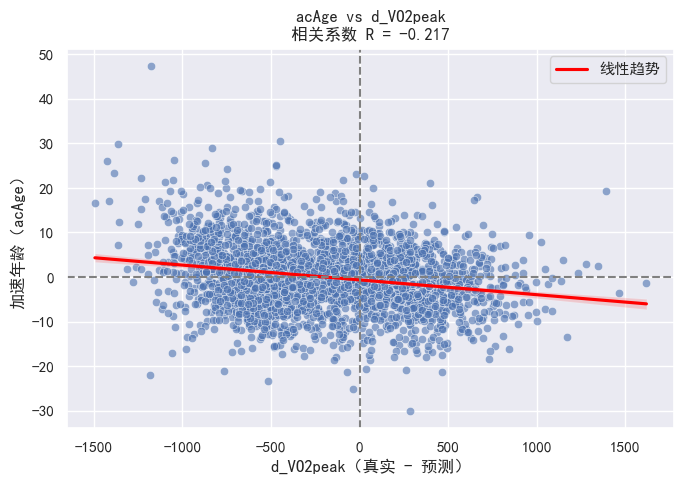

In [30]:
# ÂºïÂÖ•ÊπòÈõÖÈòüÂàóÁ†îÁ©∂ÁªìÊûúÁöÑCRFËÆ°ÁÆóÔºåÂæóÂà∞CRFÂèòÂºÇÔºåËÆ°ÁÆó‰∏éÂä†ÈÄüÂπ¥ÈæÑÁõ∏ÂÖ≥ÊÄß
# ÈÄâÂèñÂèòÈáè
cols = ['Age', 'Sex', 'Weight', 'Height', 'Âçß‰ΩçÂøÉÂÆ§Áéá', 'Â≥∞ÂÄºÂøÉÁéá', 'Â≥∞ÂÄºÊ∞ßËÄó']
df_subset = df[cols]

# Âçï‰ΩçÊç¢ÁÆóÔºåL/min -> mL/min
df_subset['VO2peak_true'] = df_subset['Â≥∞ÂÄºÊ∞ßËÄó'] * 1000  # Êñ∞Âª∫‰∏ÄÂàó‰πüÂ•ΩÔºåÈÅøÂÖçË¶ÜÁõñ

# ËÆ°ÁÆóÈ¢ÑÊµãÂÄº
# df['VO2peak_pred'] = (
#     236.68
#     - 504.64 * df['Sex']
#     + 21.23 * df['Weight']
#     - 14.31 * df['Age']
#     + 9.46 * df['Height']
# )
df_subset['VO2peak_pred_1'] = (
    1532.580
    - 328.244 * df_subset['Sex']
    - 9.951 * df_subset['Age']
    + 11.593 * df_subset['Weight']
)

import matplotlib.pyplot as plt
import seaborn as sns

# ‚úÖ 1. Ê∑ªÂä† d_VO2peak Âàó
df_subset["d_VO2peak"] = df_subset["VO2peak_true"] - df_subset["VO2peak_pred_1"]

# ‚úÖ 2. ÂêàÂπ∂Âà∞ dfÔºàÊåâÁ¥¢ÂºïÂØπÈΩêÔºâ
df["d_VO2peak"] = df_subset["d_VO2peak"]

# ‚úÖ 3. ËÆ°ÁÆóÁõ∏ÂÖ≥ÊÄß
corr = df["acAge"].corr(df["d_VO2peak"])
print(f"üìà acAge ‰∏é d_VO2peak ÁöÑÁõ∏ÂÖ≥Á≥ªÊï∞Ôºö{corr:.3f}")

# ‚úÖ 4. ÁîªÊï£ÁÇπÂõæ
plt.figure(figsize=(7,5))
sns.scatterplot(x="d_VO2peak", y="acAge", data=df, alpha=0.6)
sns.regplot(x="d_VO2peak", y="acAge", data=df, scatter=False, color='red', label='Á∫øÊÄßË∂ãÂäø')
plt.title(f"acAge vs d_VO2peak\nÁõ∏ÂÖ≥Á≥ªÊï∞ R = {corr:.3f}")
plt.xlabel("d_VO2peakÔºàÁúüÂÆû - È¢ÑÊµãÔºâ")
plt.ylabel("Âä†ÈÄüÂπ¥ÈæÑÔºàacAgeÔºâ")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()




====== üë§ ÊÄßÂà´ÂàÜÁªÑÔºöÂ•≥ÊÄß ======


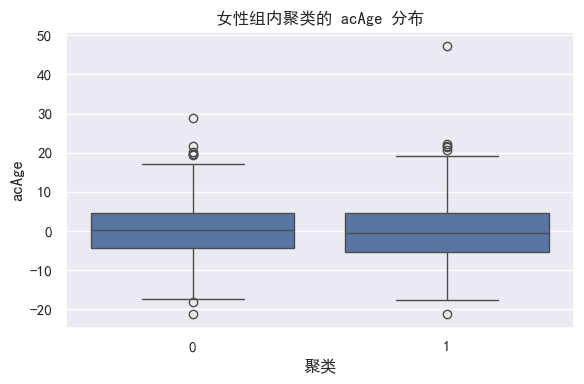

cluster              0           1
acAge         0.363670   -0.036549
FEV1          2.614457    2.118656
HR-AT       126.672481  117.924644
BPsys-AT    130.209302  138.745418
Â≥∞ÂÄºÂàÜÈíüÈÄöÊ∞îÈáè      43.004767   29.501344
Â≥∞ÂÄºÂäüÁéá         95.674419   65.368635
Â≥∞ÂÄºÊ∞ßËÄó          1.348818    0.955071
ÊØèÂàÜÈíüÈÄöÊ∞îÈáè(ÊØ´Âçá)    1.509554    1.014725
Â≥∞ÂÄºÂøÉÁéá        156.139535  134.260692
f-ergo-AT    24.591085   24.755601
acAge         0.363670   -0.036549

====== üë§ ÊÄßÂà´ÂàÜÁªÑÔºöÁî∑ÊÄß ======


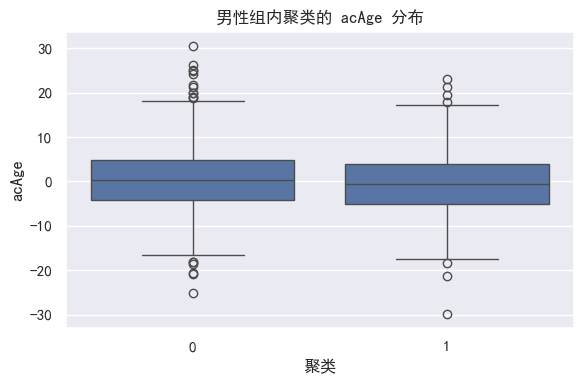

cluster              0           1
acAge         0.393653   -0.618231
FEV1          2.872637    3.577039
HR-AT       112.274571  124.706507
BPsys-AT    145.959438  148.521912
Â≥∞ÂÄºÂàÜÈíüÈÄöÊ∞îÈáè      41.280140   60.044396
Â≥∞ÂÄºÂäüÁéá        104.219969  151.540505
Â≥∞ÂÄºÊ∞ßËÄó          1.376378    2.006295
ÊØèÂàÜÈíüÈÄöÊ∞îÈáè(ÊØ´Âçá)    1.501841    2.283559
Â≥∞ÂÄºÂøÉÁéá        132.413417  156.375830
f-ergo-AT    22.663027   22.643293
acAge         0.393653   -0.618231


In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# ‚úÖ ÁâπÂæÅÂàóË°®ÔºàÂéªÊéâ Sex Êú¨Ë∫´Ôºâ
features = [
    'acAge',
    'FEV1', 'HR-AT', 'BPsys-AT', 'Â≥∞ÂÄºÂàÜÈíüÈÄöÊ∞îÈáè', 'Â≥∞ÂÄºÂäüÁéá',
    'Â≥∞ÂÄºÊ∞ßËÄó', 'ÊØèÂàÜÈíüÈÄöÊ∞îÈáè(ÊØ´Âçá)', 'Â≥∞ÂÄºÂøÉÁéá', 'f-ergo-AT'
]

# ‚úÖ ÊåâÊÄßÂà´ÂàÜÁªÑ
for sex_value, sex_label in zip([0, 1], ['Â•≥ÊÄß', 'Áî∑ÊÄß']):
    print(f"\n====== üë§ ÊÄßÂà´ÂàÜÁªÑÔºö{sex_label} ======")
    df_sex = df[df["Sex"] == sex_value][features].dropna()
    
    # Ê†áÂáÜÂåñ
    X_scaled = StandardScaler().fit_transform(df_sex)
    
    # ËÅöÁ±ªÔºàk=2Ôºâ
    kmeans = KMeans(n_clusters=2, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # Âä†ÂÖ•ËÅöÁ±ªÊ†áÁ≠æ
    df_temp = df[df["Sex"] == sex_value].copy()
    df_temp = df_temp.loc[df_sex.index]
    df_temp["cluster"] = labels

    # üìä ÂèØËßÜÂåñ acAge Âú®ÊØè‰∏™ËÅöÁ±ªÁöÑÂàÜÂ∏É
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="cluster", y="acAge", data=df_temp)
    plt.title(f"{sex_label}ÁªÑÂÜÖËÅöÁ±ªÁöÑ acAge ÂàÜÂ∏É")
    plt.xlabel("ËÅöÁ±ª")
    plt.ylabel("acAge")
    plt.tight_layout()
    plt.show()
    
    # üìà ËæìÂá∫ÊØèÁ±ªÂùáÂÄº
    print(df_temp.groupby("cluster")[features + ["acAge"]].mean().T)


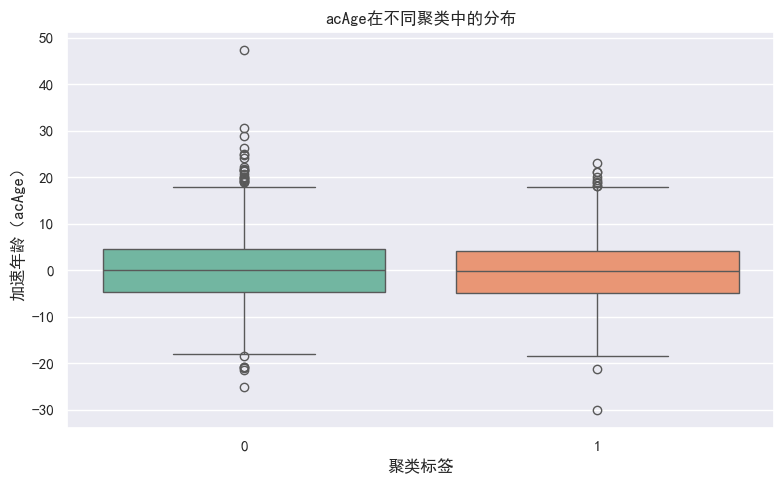

üìä ÂêÑËÅöÁ±ª‰∏≠ÂèòÈáèÂùáÂÄºÔºö
cluster              0           1
acAge         0.196746   -0.277404
FEV1          2.419962    3.443732
HR-AT       119.127190  121.987132
BPsys-AT    137.046458  147.763787
Â≥∞ÂÄºÂàÜÈíüÈÄöÊ∞îÈáè      35.825506   56.351774
Â≥∞ÂÄºÂäüÁéá         82.105103  142.072610
Â≥∞ÂÄºÊ∞ßËÄó          1.152292    1.879566
ÊØèÂàÜÈíüÈÄöÊ∞îÈáè(ÊØ´Âçá)    1.254608    2.125055
Â≥∞ÂÄºÂøÉÁéá        140.387662  151.460478
f-ergo-AT    24.323686   22.504044
Sex           0.264280    0.962316


In [36]:
# ËÆæÁΩÆËÅöÁ±ªÊï∞
n_clusters = 2  # ‰Ω†ÂèØ‰ª•Ê†πÊçÆ‰∏äÂõæ‰øÆÊîπ

# ËÅöÁ±ª
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Ê∑ªÂä†Âõû df
df_cluster["cluster"] = cluster_labels
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_cluster, x='cluster', y='acAge', palette='Set2')
plt.title("acAgeÂú®‰∏çÂêåËÅöÁ±ª‰∏≠ÁöÑÂàÜÂ∏É")
plt.xlabel("ËÅöÁ±ªÊ†áÁ≠æ")
plt.ylabel("Âä†ÈÄüÂπ¥ÈæÑÔºàacAgeÔºâ")
plt.tight_layout()
plt.show()
print("üìä ÂêÑËÅöÁ±ª‰∏≠ÂèòÈáèÂùáÂÄºÔºö")
print(df_cluster.groupby('cluster')[features].mean().T)


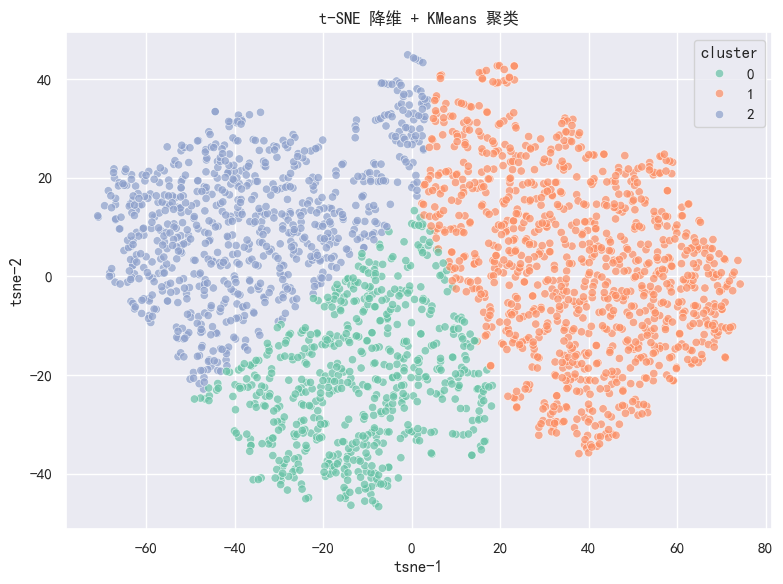

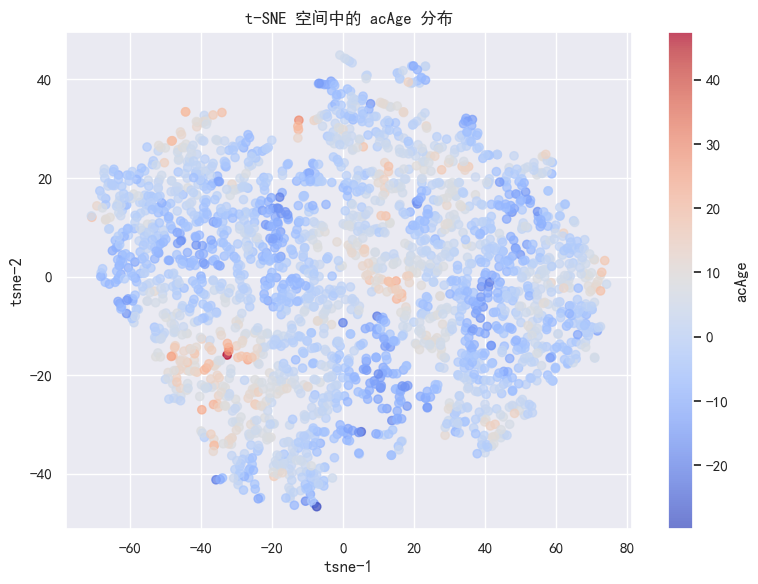

          count      mean       std        min       25%       50%       75%  \
cluster                                                                        
0         617.0  0.793228  8.248954 -29.974846 -4.261721  1.145621  5.624310   
1        1027.0  0.403884  6.723877 -21.298883 -4.022617  0.379073  4.735582   
2         773.0 -1.171748  6.994519 -20.716831 -5.841536 -1.667372  2.691594   

               max  
cluster             
0        47.371131  
1        23.038806  
2        30.620887  


In [44]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ‚úÖ ÁâπÂæÅÂàóË°®Ôºà‰∏çÂê´ SexÔºåÊú¨ËΩÆÂÖà‰∏çËÄÉËôëÊÄßÂà´Ôºâ
features_tsne = [
    'acAge',
    'FEV1', 'HR-AT', 'BPsys-AT', 'Â≥∞ÂÄºÂàÜÈíüÈÄöÊ∞îÈáè', 'Â≥∞ÂÄºÂäüÁéá',
    'Â≥∞ÂÄºÊ∞ßËÄó', 'ÊØèÂàÜÈíüÈÄöÊ∞îÈáè(ÊØ´Âçá)', 'Â≥∞ÂÄºÂøÉÁéá', 'f-ergo-AT'
]

# ‚úÖ ÂéªÈô§Áº∫Â§±
df_tsne = df[features_tsne].dropna()
X = df_tsne.values

# ‚úÖ Ê†áÂáÜÂåñ
X_scaled = StandardScaler().fit_transform(X)

# ‚úÖ t-SNE ÈôçÁª¥
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_embedded = tsne.fit_transform(X_scaled)

# ‚úÖ ËÅöÁ±ªÔºàk=3 ÊòØÊé®ËçêËµ∑ÁÇπÔºå‰Ω†ÂèØ‰ª•ËØï 2~5Ôºâ
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_embedded)

# ‚úÖ ÂêàÂπ∂ÁªìÊûú
df_tsne["tsne-1"] = X_embedded[:, 0]
df_tsne["tsne-2"] = X_embedded[:, 1]
df_tsne["cluster"] = labels

# ‚úÖ ÂèØËßÜÂåñÔºöÊåâËÅöÁ±ªÁîª t-SNE Âõæ + ÊòæÁ§∫ acAge ÂàÜÂ∏É
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_tsne, x="tsne-1", y="tsne-2", hue="cluster", palette="Set2", alpha=0.7)
plt.title("t-SNE ÈôçÁª¥ + KMeans ËÅöÁ±ª")
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt

# ‚úÖ t-SNE Á©∫Èó¥‰∏≠ acAge Êò†Â∞Ñ‰∏∫È¢úËâ≤ÁöÑÊï£ÁÇπÂõæ
plt.figure(figsize=(8, 6))
sc = plt.scatter(df_tsne["tsne-1"], df_tsne["tsne-2"], c=df_tsne["acAge"], cmap="coolwarm", alpha=0.7)
plt.colorbar(sc, label="acAge")
plt.title("t-SNE Á©∫Èó¥‰∏≠ÁöÑ acAge ÂàÜÂ∏É")
plt.xlabel("tsne-1")
plt.ylabel("tsne-2")
plt.tight_layout()
plt.show()
# ‚úÖ ÂèØÈÄâÔºöÊØè‰∏™ËÅöÁ±ª acAge Âπ≥ÂùáÂÄº
print(df_tsne.groupby("cluster")["acAge"].describe())
